In [2]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
%matplotlib inline

In [ ]:
# 由資料生成特徵
    #在原始資料集中有變化性，才能稱為特徵
    #透過這些特徵能把目標做清楚的分類與預測，才能稱為好的特徵
#生成方法：
    #延伸：了解資料與目標之間的關係後，產生出特徵。
    #添加：現有收集資料以外的資訊。

In [ ]:
# 透過挖掘資料和目標資料是否具有相關性
    # 高度相關：可單獨作為特徵
    # 中低相關：可能須作轉換，才能作為特徵
        #指示器變量(Indicator) e.g. 超過某定量，作為標籤 如>100 kg ===1
        #資料組合(Combination) e.g. 組合多個變數做出新變數 e.g. BMI = 體重/（身高＾2)
        #資料重新定義(Reshape)
            #數值分類映射 e.g. 年齡可對應成 兒童,少年,青少年
            #合併稀疏分類
            #調整時間長度
            #創造虛擬資料 e.g. one-hot encoding(新增欄位) e.g. label encoding（不改變欄位）ㄇ

In [3]:
#用字典產生一組資料
data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'insomnia':['Y','N','N','N','N','N','Y','Y','Y','N','Y','N','N','N','N','N','Y','Y','Y','N'],
     'age':[23,40,5,30,1,40,16,27,43,8,23,39,5,29,1,42,13,29,41,10],
     'height':[180,170,100,176,70,160,170,166,155,35,170,168,101,175,72,163,169,163,151,40],
     'weight':[100,68,20,70,10,45,50,58,58,17,101,65,22,79,12,40,53,52,56,14]}
#轉成 dataframe格式 
data=pd.DataFrame(data)
display(data)

print(data.info())

,sex,insomnia,age,height,weight
0,Male,Y,23,180,100
1,Male,N,40,170,68
2,Male,N,5,100,20
3,Male,N,30,176,70
4,Male,N,1,70,10
5,Female,N,40,160,45
6,Female,Y,16,170,50
7,Female,Y,27,166,58
8,Female,Y,43,155,58
9,Female,N,8,35,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       20 non-null     object
 1   insomnia  20 non-null     object
 2   age       20 non-null     int64 
 3   height    20 non-null     int64 
 4   weight    20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes
None


In [4]:
# 計算變異數的方法
print("男孩身高變異數=",statistics.variance(data['age']))
print("男孩身高變異數=",np.var(data['age'],ddof=1))

男孩身高變異數= 221.77631578947367
男孩身高變異數= 221.77631578947367


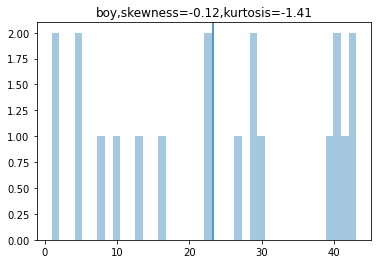

In [5]:
#最後，畫圖看分布
plt.hist(data['age'],alpha=.4,bins=40)
plt.title('boy,skewness={0},kurtosis={1}'.format(round(stats.skew(data['age']),2),round(stats.kurtosis(data['age']),2)))
plt.axvline(x=np.mean(data['age']))
plt.show()

In [6]:
data[data['insomnia']=='Y'].groupby('sex').count()
#當離散型資料不集中於某一個欄位，如此資料集，則稱為具有變異性

,insomnia,age,height,weight
sex,,,,
Female,6,6,6,6
Male,2,2,2,2


In [7]:
# 運用 apply function  做變數轉換
data['weight_new']=data['weight'].apply((lambda x: 1 if x >=100 else 0))

display(data.head(5))

,sex,insomnia,age,height,weight,weight_new
0,Male,Y,23,180,100,1
1,Male,N,40,170,68,0
2,Male,N,5,100,20,0
3,Male,N,30,176,70,0
4,Male,N,1,70,10,0


In [8]:
# 運用四則運算，來做計算
data['BMI']=round(data['weight']/data['height']/data['height']*100*100,2)

display(data.head(5))

,sex,insomnia,age,height,weight,weight_new,BMI
0,Male,Y,23,180,100,1,30.86
1,Male,N,40,170,68,0,23.53
2,Male,N,5,100,20,0,20.00
3,Male,N,30,176,70,0,22.60
4,Male,N,1,70,10,0,20.41


In [9]:
## 數值到分類的映射
# 運用 apply function  做變數轉換
def age_map(x): 
    if(x<=12):
        return('child')
    else: 
        if(x<=18):
            return('teens')
        else:
            return('adult')
    
data['age_category']=data['age'].apply(age_map)

display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category
0,Male,Y,23,180,100,1,30.86,adult
1,Male,N,40,170,68,0,23.53,adult
2,Male,N,5,100,20,0,20.00,child
3,Male,N,30,176,70,0,22.60,adult
4,Male,N,1,70,10,0,20.41,child
5,Female,N,40,160,45,0,17.58,adult
6,Female,Y,16,170,50,0,17.30,teens
7,Female,Y,27,166,58,0,21.05,adult
8,Female,Y,43,155,58,0,24.14,adult
9,Female,N,8,35,17,0,138.78,child


In [10]:
## 合併稀疏分類
contTable = pd.crosstab(data['age_category'], data['insomnia'])
contTable
# 有兩個零的存在，太過稀疏，有時候會將 age_category中的 child  和 teens 合併，但如果最後應用端要把 age 分成三種類型的話，就不會合併

insomnia,N,Y
age_category,,
adult,6,6
child,6,0
teens,0,2


In [11]:
##現在假設要合併的話可以怎麼做?
#產生一個新的 mapping function 然後做調整
def age_map_2(x): 
    if(x<=18):
        return('child_teens')
    else:
        return('adult')
    
data['age_category']=data['age'].apply(age_map_2)

display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category
0,Male,Y,23,180,100,1,30.86,adult
1,Male,N,40,170,68,0,23.53,adult
2,Male,N,5,100,20,0,20.00,child_teens
3,Male,N,30,176,70,0,22.60,adult
4,Male,N,1,70,10,0,20.41,child_teens
5,Female,N,40,160,45,0,17.58,adult
6,Female,Y,16,170,50,0,17.30,child_teens
7,Female,Y,27,166,58,0,21.05,adult
8,Female,Y,43,155,58,0,24.14,adult
9,Female,N,8,35,17,0,138.78,child_teens


In [12]:
#定義類別資料距離
data['age_category']=data['age'].apply(age_map)
size_mapping = {'child':1, 'teens':2, 'adult':3}
data['age_conti'] = data['age_category'].map(size_mapping)
display(data)


,sex,insomnia,age,height,weight,weight_new,BMI,age_category,age_conti
0,Male,Y,23,180,100,1,30.86,adult,3
1,Male,N,40,170,68,0,23.53,adult,3
2,Male,N,5,100,20,0,20.00,child,1
3,Male,N,30,176,70,0,22.60,adult,3
4,Male,N,1,70,10,0,20.41,child,1
5,Female,N,40,160,45,0,17.58,adult,3
6,Female,Y,16,170,50,0,17.30,teens,2
7,Female,Y,27,166,58,0,21.05,adult,3
8,Female,Y,43,155,58,0,24.14,adult,3
9,Female,N,8,35,17,0,138.78,child,1


In [13]:
# 先將需要的欄取出
b = data[['age_category']]
#columns 代表取出欄位,透過 prefix 來調整欄位名稱
dummy=pd.get_dummies(b, columns=['age_category'], prefix=['age'])
#資料合併
data=pd.concat([data,dummy],axis=1)
display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category,age_conti,age_adult,age_child,age_teens
0,Male,Y,23,180,100,1,30.86,adult,3,1,0,0
1,Male,N,40,170,68,0,23.53,adult,3,1,0,0
2,Male,N,5,100,20,0,20.00,child,1,0,1,0
3,Male,N,30,176,70,0,22.60,adult,3,1,0,0
4,Male,N,1,70,10,0,20.41,child,1,0,1,0
5,Female,N,40,160,45,0,17.58,adult,3,1,0,0
6,Female,Y,16,170,50,0,17.30,teens,2,0,0,1
7,Female,Y,27,166,58,0,21.05,adult,3,1,0,0
8,Female,Y,43,155,58,0,24.14,adult,3,1,0,0
9,Female,N,8,35,17,0,138.78,child,1,0,1,0


# HW

In [16]:
train = pd.read_csv('Titanic_train.csv')
train = train.dropna(axis=0)

In [17]:
#Q1：產生一個新的變數 (Age_above65_)  Age ≧ 65 為 'Y'，其餘為 'N'。  
train['Age_above56'] = train['Age'].apply(lambda x: 'Y' if x>=65 else 'N')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_above56
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,N
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,N
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,N
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,N


In [23]:
#Q2：添加女性和男性，產生一個新的變數 (Age_above65_female)，女性或 Age ≧ 65 為 'Y'，其餘為 'N'。
train['age>=65'] = train['Age'].apply(lambda x:1 if x>=65 else 0)
train['female'] = train['Sex'].apply(lambda x: 1 if x=='female' else 0)
train['Age_above65_female'] = train['age>=65']*train['female']
train['Age_above65_female'] = train['Age_above65_female'].apply(lambda x: 'Y' if x==1 else 'N')
train.drop(['age>=65','female'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_above56,Age_above65_female
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,N,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,N,N
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,N,N
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,N,N
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,N,N


In [27]:
#Q3：透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate) 的相關性較高？

import researchpy

target=train[['Age_above56','Survived']].dropna(axis=0)
contTable = pd.crosstab(target['Age_above56'], target['Survived'])
print(f'contTable: {contTable}')
print('\n')
df = min(contTable.shape[0], contTable.shape[1]) - 1
print(f'df: {df}')
print('\n')
crosstab, res = researchpy.crosstab(target['Age_above56'], target['Survived'], test='chi-square')
print(f'res: {res}')
print("Cramer's value is",res.loc[2,'results'])


contTable: Survived      0    1
Age_above56         
N            56  122
Y             4    1


df: 1


res:                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =    5.1996
1                    p-value =    0.0226
2               Cramer's phi =    0.1686
Cramer's value is 0.1686


In [28]:

target=train[['Age_above65_female','Survived']].dropna(axis=0)
contTable = pd.crosstab(target['Age_above65_female'], target['Survived'])
print(f'contTable: {contTable}')
print('\n')
df = min(contTable.shape[0], contTable.shape[1]) - 1
print(f'df: {df}')
print('\n')
crosstab, res = researchpy.crosstab(target['Age_above65_female'], target['Survived'], test='chi-square')
print(f'res: {res}')
print("Cramer's value is",res.loc[2,'results'])


contTable: Survived             0    1
Age_above65_female         
N                   60  123


df: 0


res:                 Chi-square test  results
0  Pearson Chi-square ( 0.0) =       0.0
1                    p-value =       1.0
2                             0      0.0
Cramer's value is 0.0


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/researchpy/crosstab.py:94: RuntimeWarning: invalid value encountered in true_divide
  V = numpy.sqrt(test_val / (n * min((num_row - 1), (num_col - 1))))
